-06-Basics-of-Fourier-Analysis-with-images  © by A.Richter
------------------------------------------

** Mathmathecal review - Characteristics of the Fourier-Transformation**

Fourier-Transformation is one of the most important and powerful tools in digital image processing. According to the definition found in  Bronstein, 1999, p. xxx the Fourier-Transformation $H(\omega)$ of the Function $h(t)$ is given by:
$
H(\omega)= \int\limits_{ -  \infty }^{+ \infty}   {h(t) \cdot e^{-i\omega t}dt }=FT\left[h(t)\right]
$

The inverse Transformation, to make $h(t)$ from $H(\omega)$ is given by:
$h(t)=\frac{1}{2\pi} \int\limits_{ -  \infty }^{+ \infty}   {H(\omega)e^{i\omega t}d\omega }= FT^{-1}\left[H(\omega)\right]
$


To understand the circumstances here you need a little bit calculus with complex numbers. 

Let's start with an easy example and choose **$h(t)$ an exponential function** and we will calculate demonstrative the Fourier-Transform $H(\omega)$.

$ h(t) = \beta e^{ - \alpha t}$  if $   {t \ge 0} $

$ 0$ if $ {t < 0}  $
  
 $e^{ix}  = \cos x + i\sin x $
 
 $e^{ - ix}  = \cos x - i\sin x$ 
   
 $H(f) = \int\limits_{ - \infty }^\infty  {h(t)e^{ - i2\pi ft} dt} $ 

$\omega  = 2\pi f$ 
 
$ H(\omega ) = \int\limits_{ - \infty }^\infty  {h(t)e^{ - i\omega t} dt} $ 

$ H(\omega ) = \int\limits_0^\infty  {\beta e^{ - \alpha t} e^{ - i\omega t} dt}  = \beta \int\limits_0^\infty  {e^{ - \alpha t - i\omega t} dt} $ 


$ H(\omega ) = \beta \int\limits_0^\infty  {e^{ - (\alpha  + i\omega )t} dt = } \beta \int\limits_0^\infty  {e^{ - at} dt} $  

$ a = \alpha  + i\omega  $ 

$\beta \int\limits_0^\infty  {e^{ - at} dt}  = \beta \left[ { - \frac{1}{a}e^{ - at} } \right]_0^\infty   = \beta \left[ {\underbrace { - \frac{1}{a}e^{ - \infty } }_{ = 0} + \frac{1}{a}e^0 } \right] = \frac{\beta }{a}$ 


$ \frac{\beta }{a} = \frac{\beta }{{\alpha  + i\omega }} \Rightarrow \frac{{\beta (\alpha  - i\omega )}}{{(\alpha  + i\omega )(\alpha  - i\omega )}} = \frac{{\beta \alpha  - i\beta \omega }}{{\alpha ^2  + \omega ^2 }} \\ 
  \Rightarrow \underbrace {\frac{{\beta \alpha }}{{\alpha ^2  + \omega ^2 }}}_{{\mathop{\rm Re}\nolimits} (\omega )} + i\underbrace {\frac{{( - \beta \omega )}}{{\alpha ^2  + \omega ^2 }}}_{{\mathop{\rm Im}\nolimits} (\omega )} \\ 
 \left| {H(\omega )} \right| = \sqrt {{\mathop{\rm Re}\nolimits} ^2 (\omega ) + {\mathop{\rm Im}\nolimits} ^2 (\omega )}  = \sqrt {\left( {\frac{{\beta \alpha }}{{\alpha ^2  + \omega ^2 }}} \right)^2  + \left( {\frac{{( - \beta \omega )}}{{\alpha ^2  + \omega ^2 }}} \right)^2 }  \\ 
 \left| {H(\omega )} \right| = \sqrt {\frac{{\beta ^2 \left( {\alpha ^2  + \omega ^2 } \right)}}{{\left( {\alpha ^2  + \omega ^2 } \right)^2 }}}  = \frac{\beta }{{\sqrt {\alpha ^2  + \omega ^2 } }} \\ 
 \Theta (\omega ) = \arctan \frac{{{\mathop{\rm Im}\nolimits} (\omega )}}{{{\mathop{\rm Re}\nolimits} (\omega )}} = \arctan \frac{{\left( {\frac{{( - \beta \omega )}}{{\alpha ^2  + \omega ^2 }}} \right)}}{{\left( {\frac{{\beta \alpha }}{{\alpha ^2  + \omega ^2 }}} \right)}} \\ 
 \Theta (\omega ) = \arctan \left( { - \frac{\omega }{\alpha }} \right) \\ 
  \Rightarrow H(\omega ) = \left| {H(\omega )} \right|e^{i\Theta (\omega )}  = \frac{\beta }{{\sqrt {\alpha ^2  + \omega ^2 } }}e^{i\arctan \left( { - \frac{\omega }{\alpha }} \right)} 
$





The Fourier-Transform fulfills the following properties:

It creates a chracteristic repetitive pattern in every direction/dimension of the frequency or the spatial/time domain.

There are four important Symmetries concerning the Fourier Transformation
Es gibt vier Symmetrien, die für die Fourier-Transformation von Bedeutung sind:

a) even $g(-x)=g(x)$

b) odd $g(-x)=-g(x)$

c) hermitic $g(-x)=g^*(x)$

d) antihermitic $g(-x)=-g^*(x)$


Die Kerne der Fourier-Transformation sind hermitisch, d.h. jede Funktion $g(x)$ kann in ihren geraden und ihren ungeraden Anteil zerlegt werden. Die Fourier-Transformation kann in Kosinus-Transformation und Sinus-Transformation zerlegt werden. Die Fourier-Transformierte einer geraden/ ungeraden Funktion ist ebenfalls gerade/ ungerade.  

$FT[g(t) \otimes f(t)] = FT[g(t)] \cdot FT[f(t)]$
und damit im Rückschluss für den Ortsraum

$g(t) \otimes f(t) = FT^{-1}\left[ FT[g(t)] \cdot FT[f(t)]\right]$

Der Faltungssatz besagt, dass eine Bildfaltung im Ortsraum einer Multiplikation im Frequenzraum und umgekehrt entspricht.

** Computational review - Characteristics of the Fourier-Transformation**

From the comoutational point of view the these theoretical reviews are not very sufficient. Computer always calculate with discrete datasets there for a discrete formalism of the Fourier Transform has to be analysed to understand the algorithms in detail. 

The formulas used to calculate the discrete version of the Fourier-Transform are shown here:
    

The so called Fast-Fourier-Transform (FFT) algorithm makes use of the properties from above, the symmetry and 

Import of modules and libraries...

In [2]:
from skimage import exposure
from skimage import data,filters,feature
from skimage import io as skio

from scipy.misc import bytescale

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

In [7]:
DataSeries=np.arange(8)
for element in DataSeries:  print(element) 

0
1
2
3
4
5
6
7


lets make 1-d Fourier Transformation of this DataSeries by the given formulas and compare the results with the output of np.fft.fft()

Its 8 values in the series so N = 8

In [5]:
np.sum(DataSeries)

28

The sum of the original DataSeries is always the first value in the Fourier-Transformed Vector.

In [6]:
FTDataSeries=np.fft.fft(DataSeries)
for element in FTDataSeries:  print(element) 

(28+0j)
(-4+9.65685424949j)
(-4+4j)
(-4+1.65685424949j)
(-4+0j)
(-4-1.65685424949j)
(-4-4j)
(-4-9.65685424949j)


Concerning a two-dimensional input dataset like the numpy array below. The two dimensional Fourier-Transform is based on the one-dimensional Transform but for every dimension after each other:

In [8]:
A=np.array([[2,4,3,7],[1,2,3,4],[-2,4,5,7],[4,3,7,9]])
print(A)

[[ 2  4  3  7]
 [ 1  2  3  4]
 [-2  4  5  7]
 [ 4  3  7  9]]


In [11]:
print(np.sum(A[0,:]))
print(np.sum(A[1,:]))
print(np.sum(A[2,:]))
print(np.sum(A[3,:]))

16
10
14
23


In [9]:
FTA=np.fft.fft2(A)
print(FTA)

[[ 63. +0.j -13.+14.j -17. +0.j -13.-14.j]
 [  2.+13.j   2. -1.j   2. +1.j  10. -1.j]
 [ -3. +0.j  -3. -2.j -11. +0.j  -3. +2.j]
 [  2.-13.j  10. +1.j   2. -1.j   2. +1.j]]


**Fourier Transformation of Point-feature**

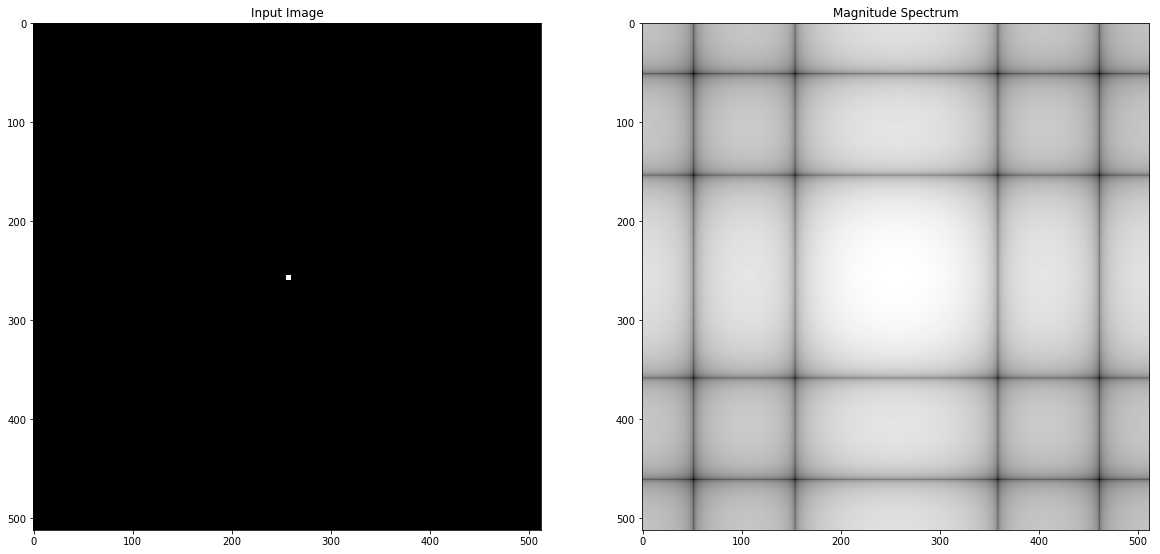

In [37]:
Img_Point=np.zeros((512,512),np.uint8)
#print Img_Line.shape

Img_Point[255:260,255:260]=255   # Change the Size (5x5 Pixels) of the dot 

Img_Pointfft=np.fft.fft2(Img_Point)
Img_Pointshift=np.fft.fftshift(Img_Pointfft)
Img_Point_m_spectrum = 100*np.log(np.abs(Img_Pointshift))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(Img_Point, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_Point_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()


**Fourier Transformation of a Line-feature**

(512, 512)


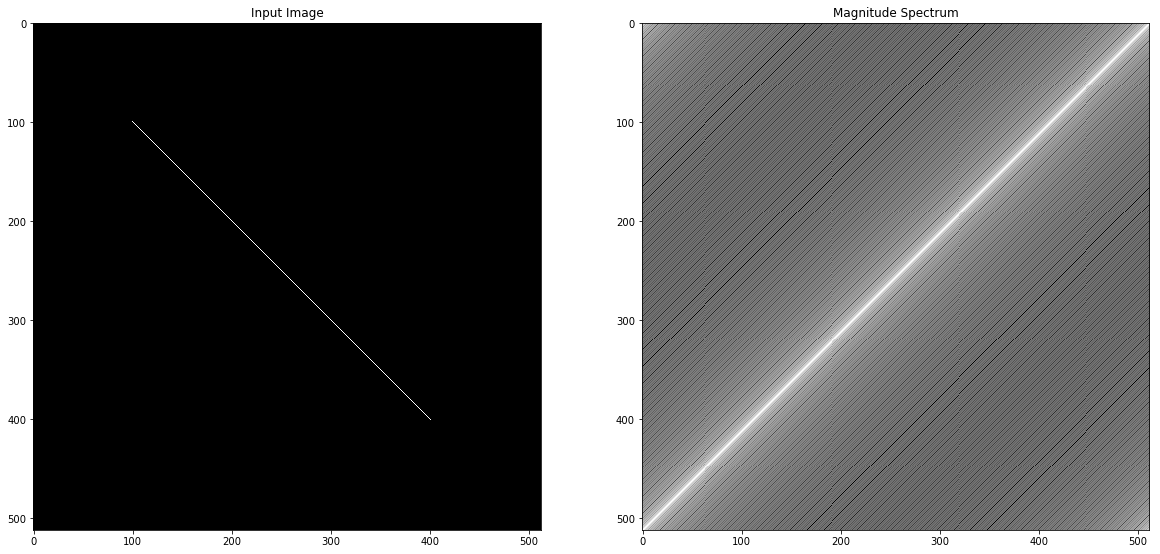

In [38]:
Img_Line=np.zeros((512,512),np.uint8)
#print Img_Line.shape
#plt.imshow(Img_Line,cmap='gray')
#plt.show()


cv2.line(Img_Line,(100,100),(400,400),(255,0,0),1)   # Ändern Sie die Dicke (=1 Pixel) und die Richtung der Linie
print( Img_Line.shape)
#plt.imshow(Img_Line,cmap='gray')
#plt.show()

Img_Linefft=np.fft.fft2(Img_Line)
Img_Lineshift=np.fft.fftshift(Img_Linefft)
Img_Line_m_spectrum = 100*np.log(np.abs(Img_Lineshift))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(Img_Line, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_Line_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()


**Fourier Transformation of a Polygon-feature (Rectangle)**

(512, 512)


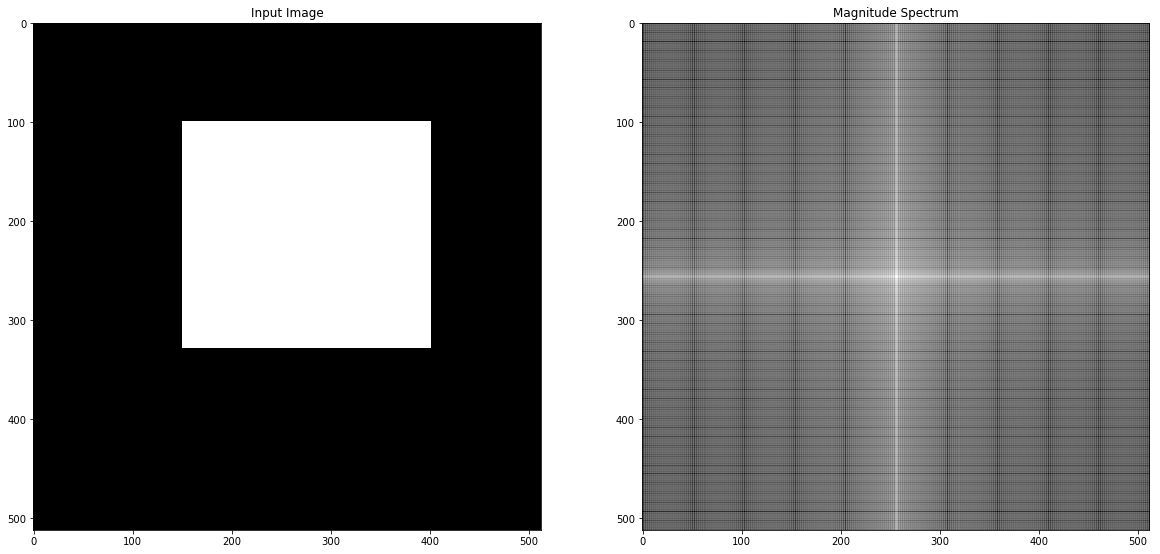

In [39]:
Img_Rec=np.zeros((512,512),np.uint8)
#print Img_Rec.shape
#plt.imshow(Img_Rec,cmap='gray')
#plt.show()


cv2.rectangle(Img_Rec,(150,100),(400,328),(255,255,255),-1 )  # Ändern Sie die Größe des Rechtecks 
print( Img_Rec.shape)
#plt.imshow(Img_Rec,cmap='gray')
#plt.show()

Img_Recfft=np.fft.fft2(Img_Rec)
Img_Recshift=np.fft.fftshift(Img_Recfft)
Img_Rec_m_spectrum = 100*np.log(np.abs(Img_Recshift))

plt.figure(figsize=(20,10))

plt.subplot(121),plt.imshow(Img_Rec, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_Rec_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()

**...with a Rotation of the Rectangle**

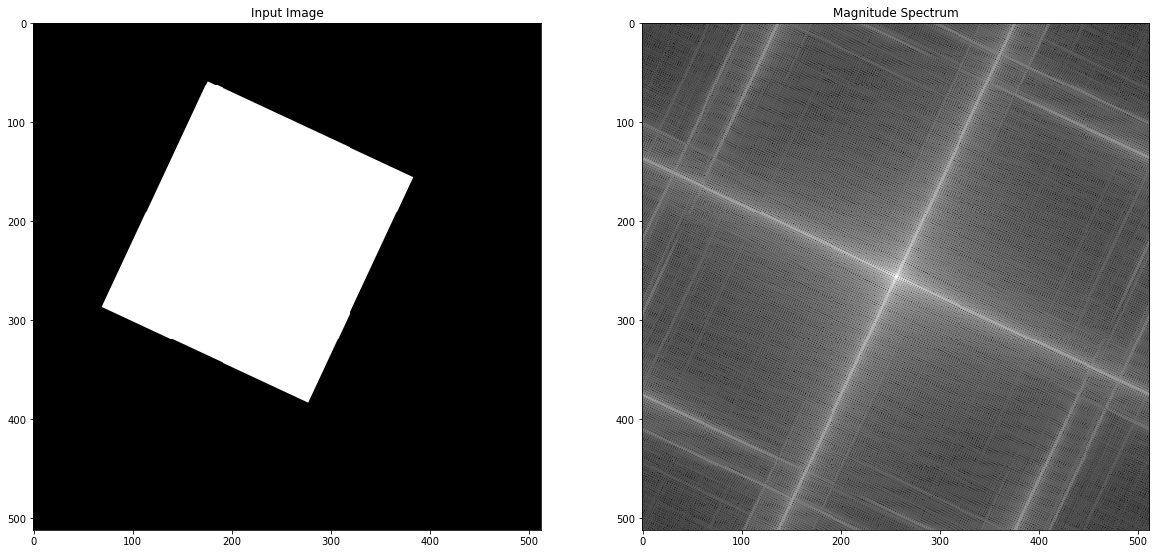

In [40]:
rows,cols = Img_Rec.shape
    
M = cv2.getRotationMatrix2D((cols/2,rows/2),65,1)    # Rotation um 65°, ändern Sie den Winkel 
Img_RecRot = cv2.warpAffine(Img_Rec,M,(cols,rows))

Img_RecRotfft=np.fft.fft2(Img_RecRot)
Img_RecRotshift=np.fft.fftshift(Img_RecRotfft)
Img_RecRot_m_spectrum = 100*np.log(np.abs(Img_RecRotshift))

plt.figure(figsize=(20,10))

plt.subplot(121),plt.imshow(Img_RecRot, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_RecRot_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()


**Fourier Transformation of a Circle-feature**

(512, 512)


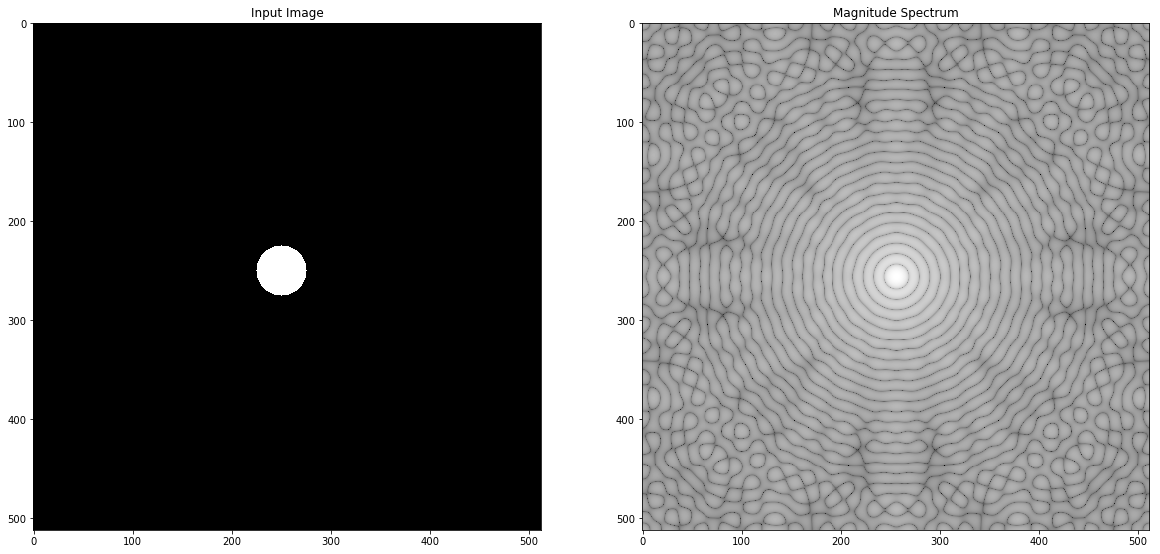

In [41]:
Img_Circ=np.zeros((512,512),np.uint8)
#print Img_Circ.shape
#plt.imshow(Img_Circ,cmap='gray')
#plt.show()


cv2.circle(Img_Circ,(250,250),25,(255,255,255),-1)     # Radius R=25 hier, vergrößern und Verkleinern Sie den Wert. 
print( Img_Circ.shape)
#plt.imshow(Img_Circ,cmap='gray')
#plt.show()

Img_Circfft=np.fft.fft2(Img_Circ)
Img_Circshift=np.fft.fftshift(Img_Circfft)
Img_Circ_m_spectrum = 100*np.log(np.abs(Img_Circshift))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(Img_Circ, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_Circ_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()

**Fourier Transformation of a Elliptic-feature**

(512, 512)


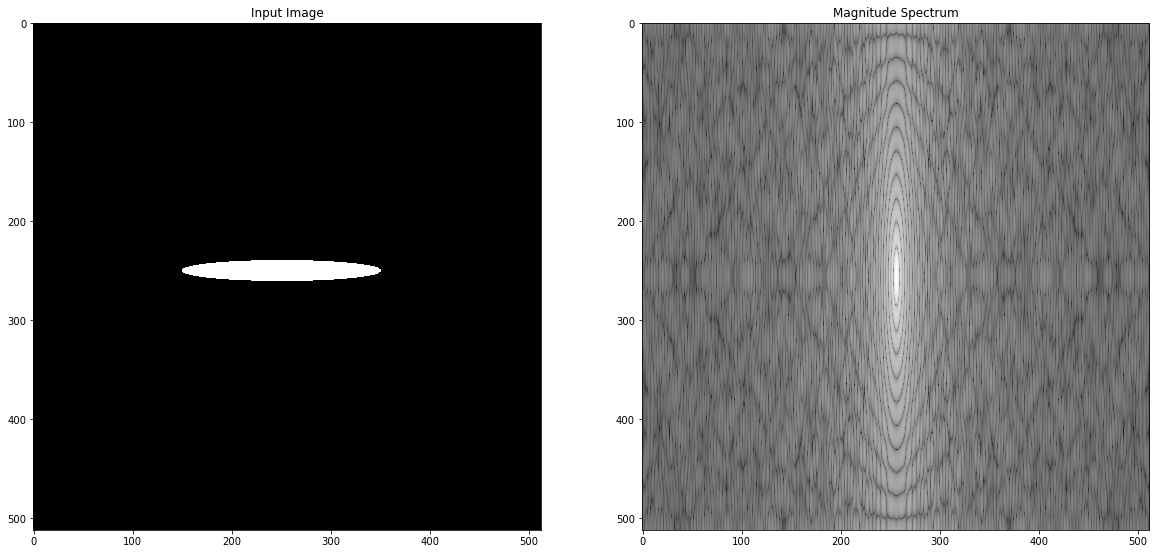

In [42]:
Img_Ell=np.zeros((512,512),np.uint8)
#print Img_Ell.shape
#plt.imshow(Img_Ell,cmap='gray')
#plt.show()


cv2.ellipse(Img_Ell,(250,250),(100,10),0,0,360,255,-1) # Ändern Sie kleine (10) und Große (100) Halbachese der Ellipse
print(Img_Ell.shape)
#plt.imshow(Img_Ell,cmap='gray')
#plt.show()


Img_Ellfft=np.fft.fft2(Img_Ell)
Img_Ellshift=np.fft.fftshift(Img_Ellfft)
Img_Ell_m_spectrum = 100*np.log(np.abs(Img_Ellshift))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(Img_Ell, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_Ell_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()

**Fourier Transformation of an image**

(620, 475)
rows:  620
cols:  475


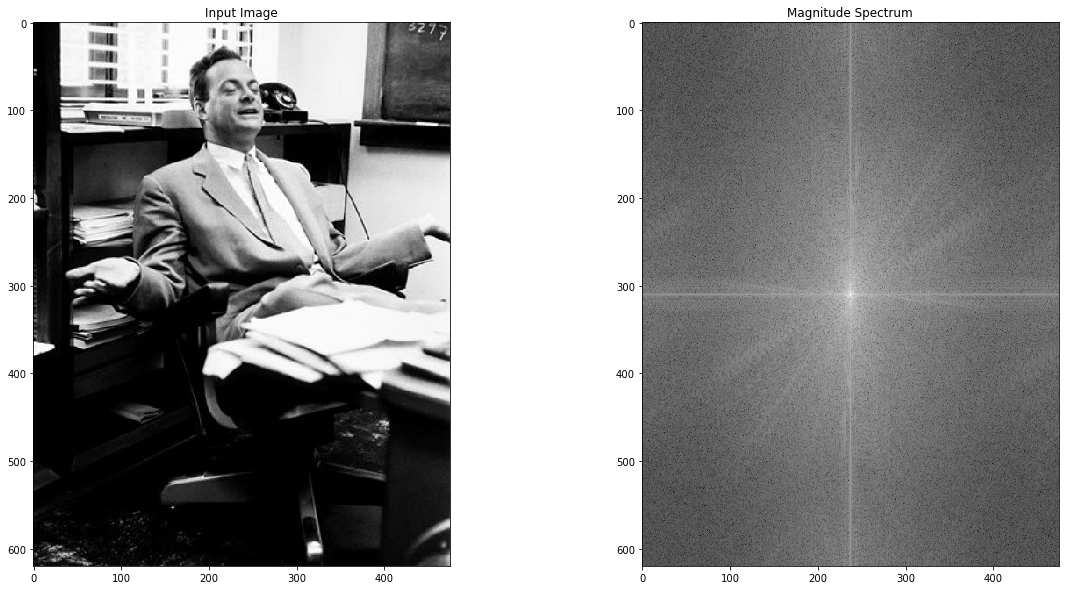

In [43]:
#img=skio.imread('doug.jpg')     # Testen Sie verschiedene Bilder
img=skio.imread('figures/feynman.png')

#Transformation in Frequenzraum

rows, cols = img.shape[0:2]
print( img.shape)
print( "rows: ", rows)
print("cols: ",cols)

imgfft=np.fft.fft2(img)
fimgshift=np.fft.fftshift(imgfft)
magnitude_spectrum = 100*np.log(np.abs(fimgshift))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()